In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

import missingno as msgn 

In [2]:
data = pd.read_csv("C:/Users/kara/Downloads/owid-covid-data.csv")

In [3]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355444,ZWE,Africa,Zimbabwe,2023-11-05,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355445,ZWE,Africa,Zimbabwe,2023-11-06,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355446,ZWE,Africa,Zimbabwe,2023-11-07,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355447,ZWE,Africa,Zimbabwe,2023-11-08,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,317456.0,6.796974e+06,4.123893e+07,1.0000,8285.000000,7.143600e+04,7.667340e+05,7.718202e+08
new_cases,345855.0,9.457200e+03,1.094194e+05,0.0000,0.000000,1.000000e+00,2.510000e+02,8.401960e+06
new_cases_smoothed,344596.0,9.491605e+03,9.374232e+04,0.0000,0.286000,2.357100e+01,4.821430e+02,6.402036e+06
total_deaths,295737.0,8.666838e+04,4.426444e+05,1.0000,128.000000,1.341000e+03,1.198800e+04,6.978162e+06
new_deaths,345907.0,8.423524e+01,6.089865e+02,0.0000,0.000000,0.000000e+00,3.000000e+00,2.793900e+04
...,...,...,...,...,...,...,...,...
population,355449.0,1.282571e+08,6.600520e+08,47.0000,449002.000000,5.882259e+06,2.830170e+07,7.975105e+09
excess_mortality_cumulative_absolute,12211.0,5.312168e+04,1.494480e+05,-37726.0980,121.649992,5.968999e+03,3.770731e+04,1.289776e+06
excess_mortality_cumulative,12211.0,9.760347e+00,1.229389e+01,-44.2300,1.430000,8.100000e+00,1.538000e+01,7.662000e+01
excess_mortality,12211.0,1.133770e+01,2.516691e+01,-95.9200,-1.590000,5.720000e+00,1.630000e+01,3.776300e+02


In [5]:
len(data.columns)

67

## we have `67` features in this dataset, let us explore these features.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355449 entries, 0 to 355448
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    355449 non-null  object 
 1   continent                                   338557 non-null  object 
 2   location                                    355449 non-null  object 
 3   date                                        355449 non-null  object 
 4   total_cases                                 317456 non-null  float64
 5   new_cases                                   345855 non-null  float64
 6   new_cases_smoothed                          344596 non-null  float64
 7   total_deaths                                295737 non-null  float64
 8   new_deaths                                  345907 non-null  float64
 9   new_deaths_smoothed                         344677 non-null  float64
 

In [7]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [8]:
data.median_age

0         18.6
1         18.6
2         18.6
3         18.6
4         18.6
          ... 
355444    19.6
355445    19.6
355446    19.6
355447    19.6
355448    19.6
Name: median_age, Length: 355449, dtype: float64

<Axes: >

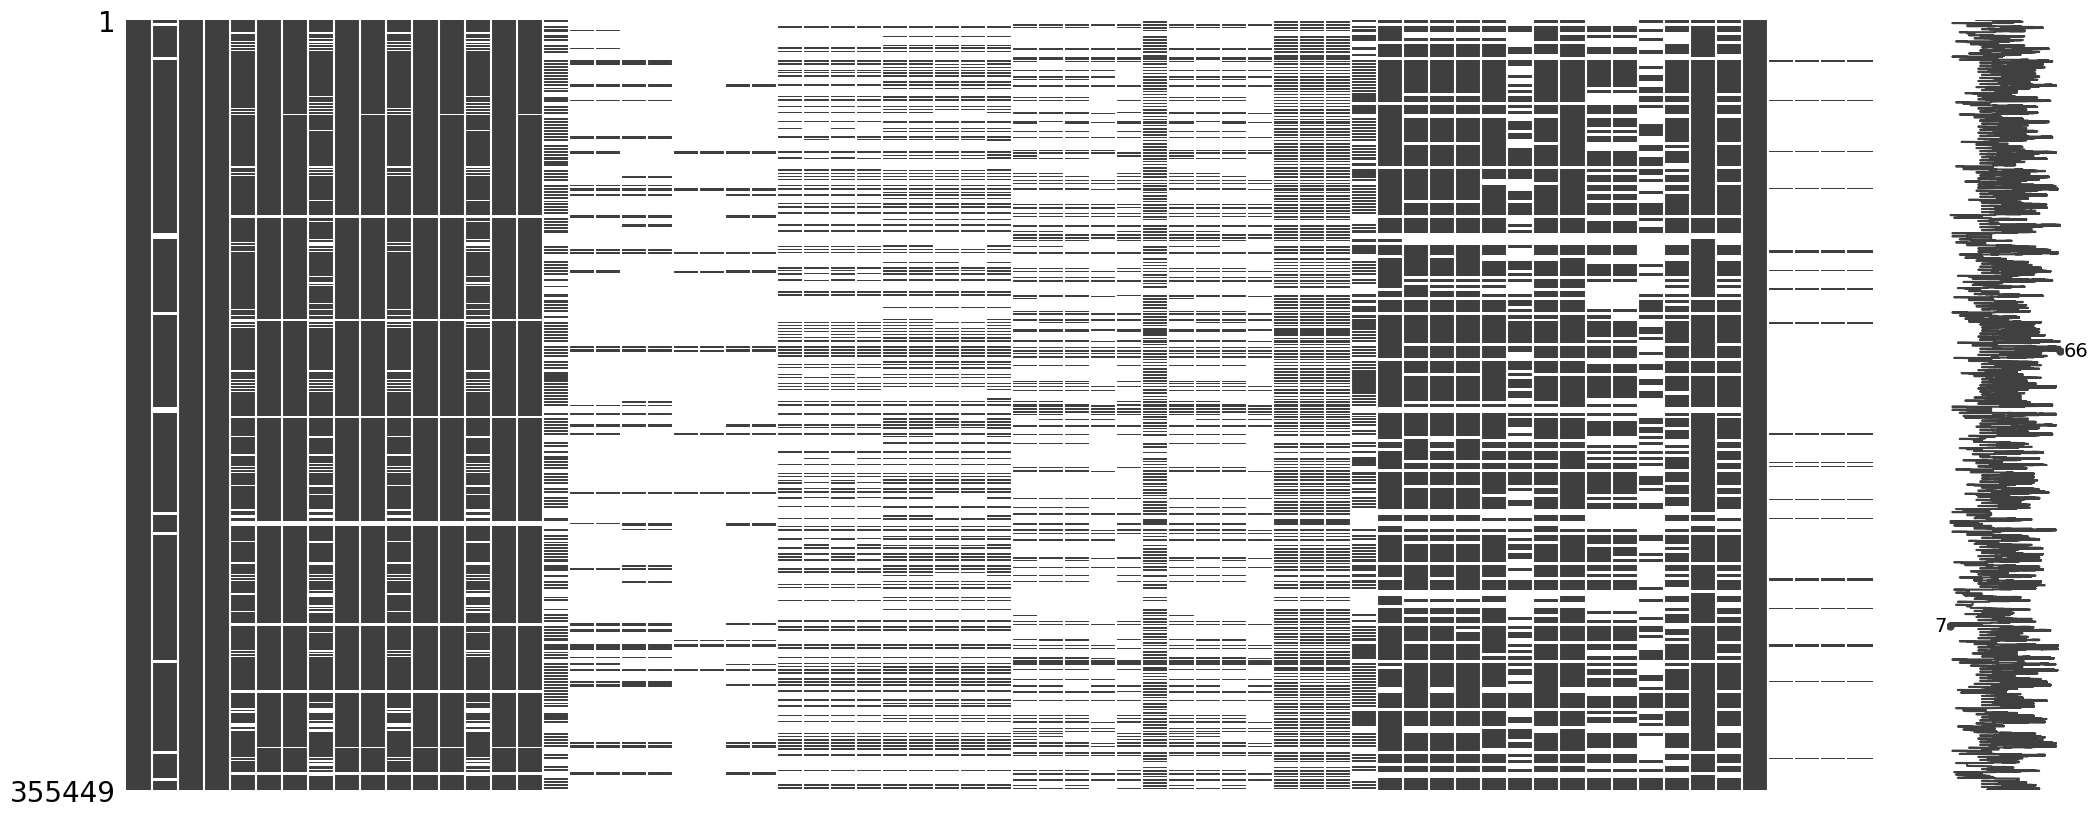

In [9]:
msgn.matrix(data)

## Working on `NaN` values.

### Visualizing categorical features.

In [10]:
dict_misses = {}
def nan_counter(data):
    cols = data.columns
    for col in cols:
        print(f"name: {col}\nnumber of NaN vslues: {data[col].isna().sum()}")
        print("*" * 100)
        dict_misses.update({col : data[col].isna().sum()})

In [11]:
categorical_features = data.select_dtypes(np.object_)
numerical_features = data.select_dtypes(np.number)
print(f"categorical NaN:{nan_counter(categorical_features)}\n numerical NaN:{nan_counter(numerical_features)}")

name: iso_code
number of NaN vslues: 0
****************************************************************************************************
name: continent
number of NaN vslues: 16892
****************************************************************************************************
name: location
number of NaN vslues: 0
****************************************************************************************************
name: date
number of NaN vslues: 0
****************************************************************************************************
name: tests_units
number of NaN vslues: 248661
****************************************************************************************************
name: total_cases
number of NaN vslues: 37993
****************************************************************************************************
name: new_cases
number of NaN vslues: 9594
****************************************************************************************************


In [23]:
miss_info = pd.DataFrame(dict_misses, index=np.arange(len(dict_misses)))
miss_info[['new_deaths', 'total_deaths', 'reproduction_rate', 'life_expectancy', 'human_development_index', 'diabetes_prevalence', 
                           'gdp_per_capita', 'new_cases']].head(1)

,new_deaths,total_deaths,reproduction_rate,life_expectancy,human_development_index,diabetes_prevalence,gdp_per_capita,new_cases
0,9542,59712,170632,28374,88205,65693,80375,9594


In [10]:
data.tests_units.unique()

array([nan, 'tests performed', 'units unclear', 'samples tested',
       'people tested'], dtype=object)

In [11]:
data.icu_patients.unique()

array([  nan,   62.,   67., ..., 1732., 1814., 1639.])

In [12]:
data.life_expectancy.unique()

array([64.83,   nan, 78.57, 76.88, 73.74, 83.73, 61.15, 81.88, 77.02,
       76.67, 75.09, 76.29, 83.44, 81.54, 73.  , 73.92, 77.29, 72.59,
       79.19, 74.79, 81.63, 74.62, 61.77, 82.59, 71.78, 71.51, 77.79,
       77.4 , 69.59, 75.88, 79.07, 75.86, 75.05, 61.58, 69.82, 59.29,
       82.43, 72.98, 83.92, 53.28, 54.24, 80.18, 76.91, 64.32, 64.57,
       76.25, 80.28, 57.78, 78.49, 78.8 , 78.88, 80.98, 79.38, 60.68,
       80.9 , 67.11, 75.  , 74.08, 77.01, 71.99, 73.32, 58.74, 66.32,
       78.74, 60.19, 66.6 , 80.67, 81.44, 67.44, 81.91, 82.66, 79.95,
       77.66, 66.47, 62.05, 73.77, 81.33, 64.07, 79.93, 82.24, 71.7 ,
       72.4 , 82.14, 80.07, 74.3 , 61.6 , 58.32, 69.91, 64.  , 75.27,
       84.86, 82.99, 69.66, 71.72, 76.68, 70.6 , 82.3 , 81.4 , 82.97,
       83.51, 74.47, 84.63, 74.53, 73.6 , 66.7 , 68.37, 75.49, 71.45,
       67.92, 75.29, 78.93, 54.33, 64.1 , 72.91, 82.49, 75.93, 82.25,
       84.24, 67.04, 64.26, 76.16, 78.92, 59.31, 82.53, 73.7 , 82.54,
       64.92, 74.99,

check the `new_deaths` and `new_cases`

check the `reproduction_rate`

check the `life_expectancy`

cehck the `human_development_index` 

check the `diabetes_prevalence` diabete

check the `gdp_per_capita` power of buy 
check the age parameters

we should drop: 
-   `continent` since we have location.
-   `icu_patients` since it is high null percentage.
-   `excess_mortality_cumulative_absolute` null
-   `excess_mortality_cumulative` null
-   `excess_mortality` null
-   `excess_mortality_cumulative_per_million` null

In [13]:
data.drop(['continent', 'icu_patients', 'excess_mortality_cumulative_absolute', 
           'excess_mortality_cumulative', 'excess_mortality', 
           'excess_mortality_cumulative_per_million'], axis = 1, inplace=True)

### checkint the correlation between numeric features and new deaths and total deaths.

In [87]:
important_features = data[['new_deaths', 'total_deaths', 'reproduction_rate', 'life_expectancy', 'human_development_index', 'diabetes_prevalence', 
                           'gdp_per_capita', 'new_cases']]

In [91]:
important_features.corr()

,new_deaths,total_deaths,reproduction_rate,life_expectancy,human_development_index,diabetes_prevalence,gdp_per_capita,new_cases
new_deaths,1.000000,0.447686,0.030187,0.009635,0.028504,-0.002299,0.011977,0.499549
total_deaths,0.447686,1.000000,0.025894,0.010900,0.033791,0.009614,0.009004,0.411652
reproduction_rate,0.030187,0.025894,1.000000,0.244290,0.233222,-0.033664,0.169846,0.024836
life_expectancy,0.009635,0.010900,0.244290,1.000000,0.820173,0.195342,0.681968,0.011187
human_development_index,0.028504,0.033791,0.233222,0.820173,1.000000,0.168111,0.708563,0.021460
diabetes_prevalence,-0.002299,0.009614,-0.033664,0.195342,0.168111,1.000000,0.121136,-0.002346
gdp_per_capita,0.011977,0.009004,0.169846,0.681968,0.708563,0.121136,1.000000,0.014672
new_cases,0.499549,0.411652,0.024836,0.011187,0.021460,-0.002346,0.014672,1.000000


<Axes: >

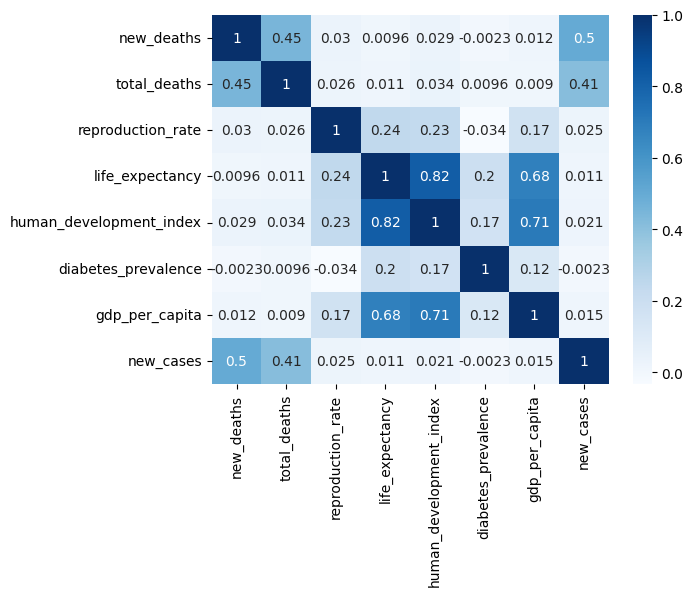

In [94]:
sns.heatmap(important_features.corr(), cmap= 'Blues', annot=True)

## lets check the life expectancy and death.

### outlier detection and handling. 

In [32]:
data['date'] = pd.to_datetime(data['date'])

Text(0.5, 1.0, 'life_expectancy box plot')

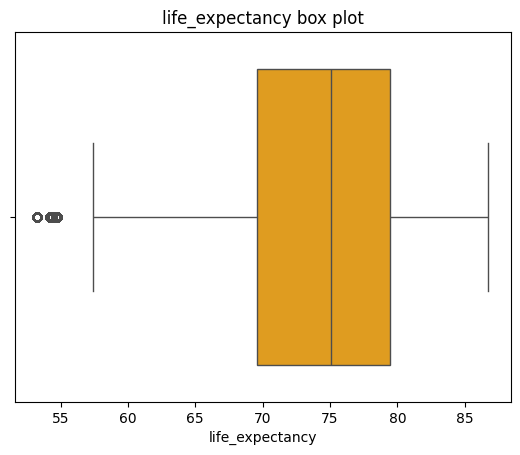

In [28]:
sns.boxplot(x=data['life_expectancy'], color = 'orange')
plt.title('life_expectancy box plot')

In [65]:
def outlier_remove(data):
    q25, q75 = np.percentile(data, 20), np.percentile(data, 80)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    return outliers_removed

In [66]:
# filling miss values with averaage life expactancy
data['life_expectancy'].fillna(data['life_expectancy'].mean(), inplace=True)

In [67]:
removed_outlier = outlier_remove(data['life_expectancy'])

Percentiles: 25th=67.570, 75th=80.220, IQR=12.650
Identified outliers: 0


C:\Users\kara\AppData\Local\Temp\ipykernel_15588\3623745166.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


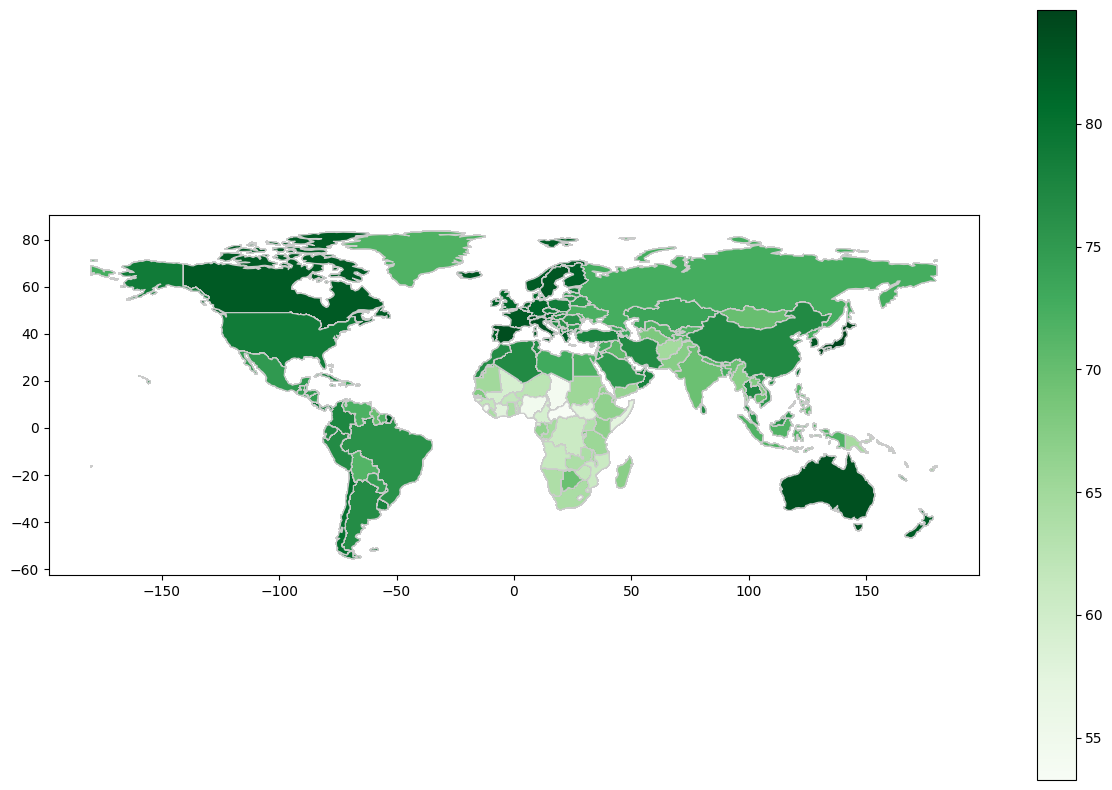

In [98]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()
merged_data = world.merge(data[["iso_code", 'life_expectancy']], left_on='iso_a3', right_on='iso_code', how='left')
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='life_expectancy', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

Text(0.5, 1.0, 'life expectancy effect on new deaths')

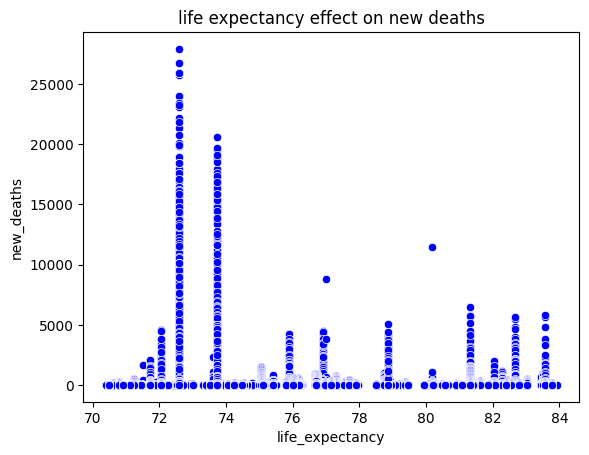

In [77]:
sns.scatterplot(x = data[(data['life_expectancy'] >= 70) & (data['life_expectancy'] <= 84)]['life_expectancy'],
                 y = data[(data['life_expectancy'] >= 70) & (data['life_expectancy'] <= 84)]['new_deaths'], color = 'blue')
plt.title('life expectancy effect on new deaths')

as we can see in above scatterplot, in countries with high `life_expectancy`, new deaths are decreased.

## we can also check the `HDI` effect on death.

<Axes: xlabel='human_development_index'>

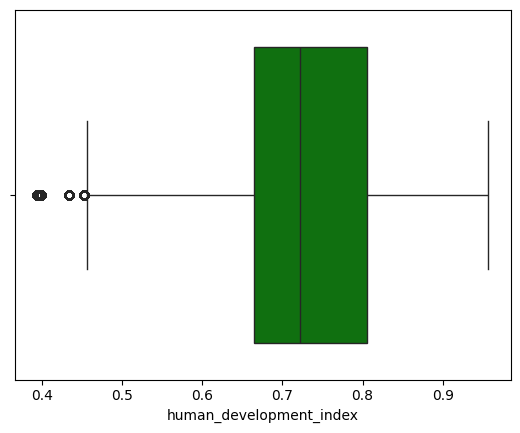

In [63]:
sns.boxplot(x=data['human_development_index'], color = 'g')

In [21]:
data['human_development_index'].fillna(data['human_development_index'].mean(), inplace= True)

In [22]:
removed_outlier = outlier_remove(data['human_development_index'])

Percentiles: 25th=0.611, 75th=0.825, IQR=0.214
Identified outliers: 0


Text(0.5, 1.0, 'HDI effect on new deaths')

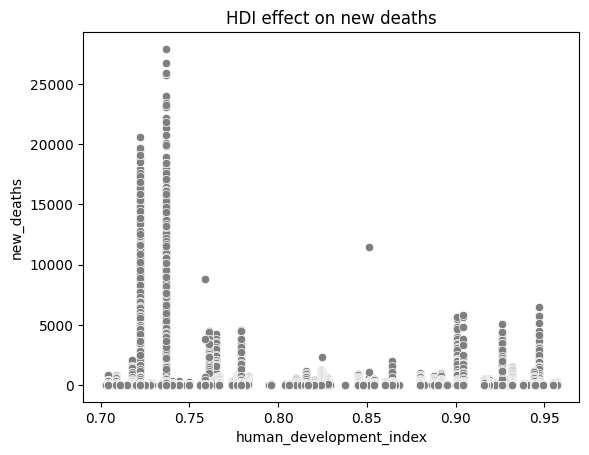

In [76]:
sns.scatterplot(x = data[(data['human_development_index'] >= 0.7) & (data['human_development_index'] <= 1)]['human_development_index'],
                 y = data[(data['human_development_index'] >= 0.7) & (data['human_development_index'] <= 1)]['new_deaths'], color = '#7f7f7f')
plt.title('HDI effect on new deaths')

C:\Users\kara\AppData\Local\Temp\ipykernel_15588\2731930954.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


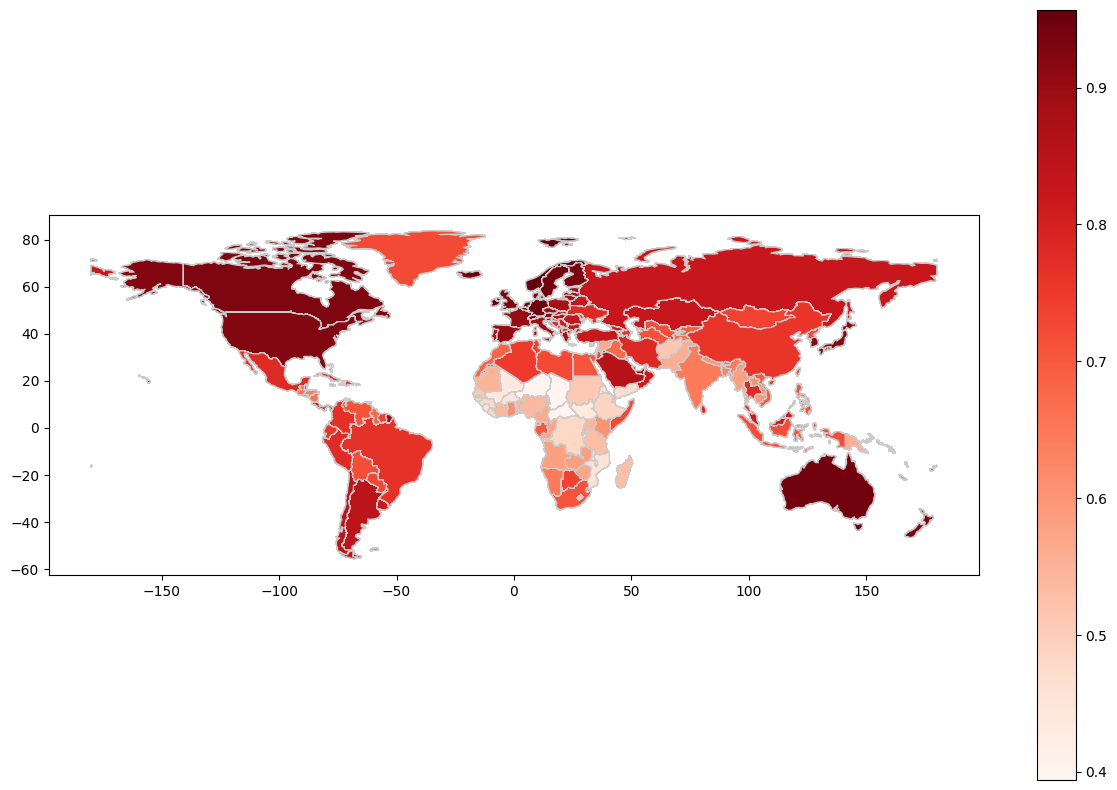

In [97]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()
merged_data = world.merge(data[["iso_code", "human_development_index"]], left_on='iso_a3', right_on='iso_code', how='left')
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='human_development_index', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

same as the `life_expectancy`, this feature also has negative correltion with new deaths, 

## `diabetes_prevalence` column check.

In [24]:
data['diabetes_prevalence'].unique()

array([ 9.59,   nan, 10.08,  6.73,  7.97,  3.94, 13.17,  5.5 ,  7.11,
       11.62,  5.07,  6.35, 16.52,  8.38, 13.57,  5.18,  4.29, 17.11,
        0.99, 13.  ,  9.75,  6.89,  4.81,  8.11, 13.67, 12.79,  5.81,
        2.42,  6.05,  4.  ,  7.2 ,  7.37, 13.22,  6.1 ,  8.46,  9.74,
        7.44, 11.88,  8.78,  5.59,  8.27,  9.24,  6.82,  6.41,  8.2 ,
        5.55, 17.31,  8.87,  7.78,  4.02,  7.47, 14.49,  5.76,  4.77,
       22.63,  1.91,  8.31,  4.97,  4.55,  2.16, 10.71, 21.52, 10.18,
        6.65,  7.21,  8.33,  7.55,  5.31, 10.39,  6.32,  8.83,  3.28,
        6.74,  4.78, 11.28,  5.72, 11.75,  2.92, 22.66, 15.84,  4.91,
       12.71, 10.43,  7.77,  3.67,  4.42, 16.74,  9.19, 30.53, 22.02,
       13.06, 12.02,  5.46,  4.82,  7.14,  3.3 ,  4.61, 24.07,  7.26,
        5.29, 23.36,  8.08, 11.47, 12.61,  8.35, 15.89, 10.59, 17.65,
        5.95,  7.07,  5.91,  9.85, 12.9 ,  6.18,  4.28, 12.84,  9.21,
        5.64, 17.72, 10.55, 10.99,  7.29,  7.25, 18.68,  5.52,  6.8 ,
        7.17, 10.68,

In [25]:
data['diabetes_prevalence'].fillna(data['diabetes_prevalence'].mean(), inplace=True)

Text(0.5, 1.0, 'diabetes prevalence effect on new deaths')

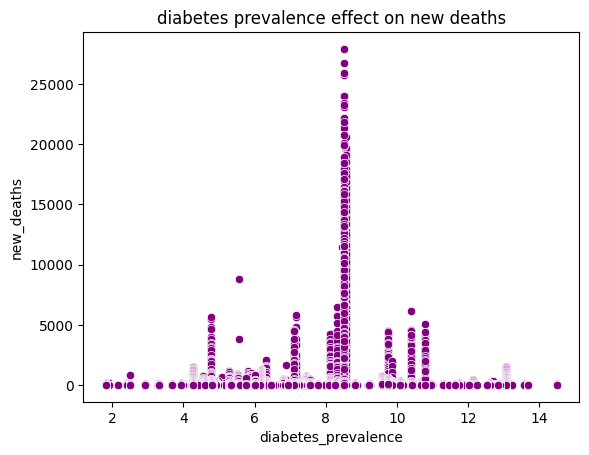

In [80]:
sns.scatterplot(x = data[(data['diabetes_prevalence'] >= 1) & (data['diabetes_prevalence'] <= 15)]['diabetes_prevalence'],
                 y = data[(data['diabetes_prevalence'] >= 1) & (data['diabetes_prevalence'] <= 15)]['new_deaths'], color = 'purple')
plt.title('diabetes prevalence effect on new deaths')

## `reproduction_rate` by time.

<Axes: xlabel='date', ylabel='reproduction_rate'>

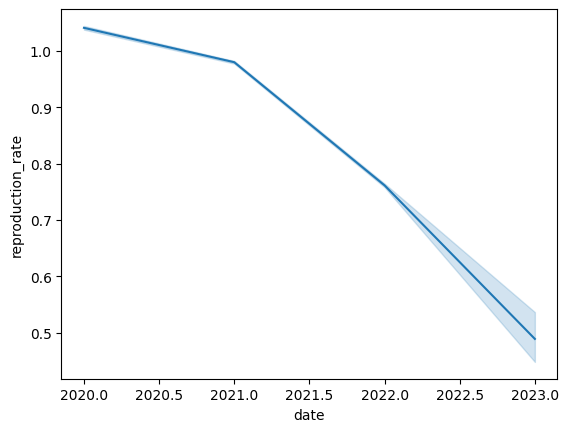

In [27]:
sns.lineplot(data = data, x = data['date'].dt.year, y = 'reproduction_rate')

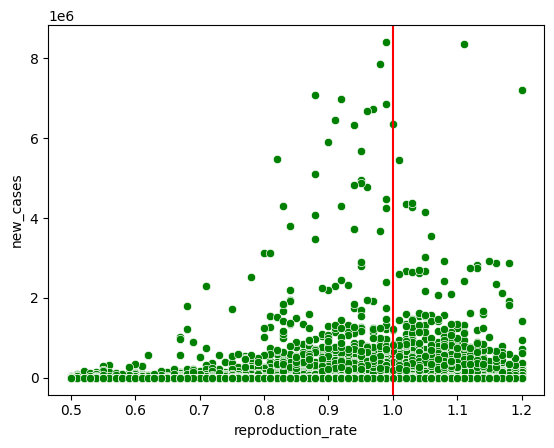

In [28]:
sns.scatterplot(x = data[(data['reproduction_rate'] >= 0.5) & (data['reproduction_rate'] <= 1.2)]['reproduction_rate'],
                 y = data[(data['reproduction_rate'] >= 0.5) & (data['reproduction_rate'] <= 1.2)]['new_cases'], color = 'green')
plt.axvline(1, color = 'r')

<Axes: xlabel='date', ylabel='new_cases'>

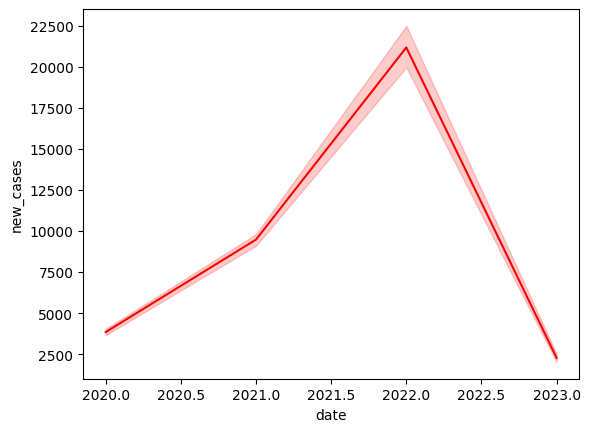

In [36]:
sns.lineplot(x = data['date'].dt.year, y = data['new_cases'], color = 'r')

C:\Users\kara\AppData\Local\Temp\ipykernel_15588\754310863.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


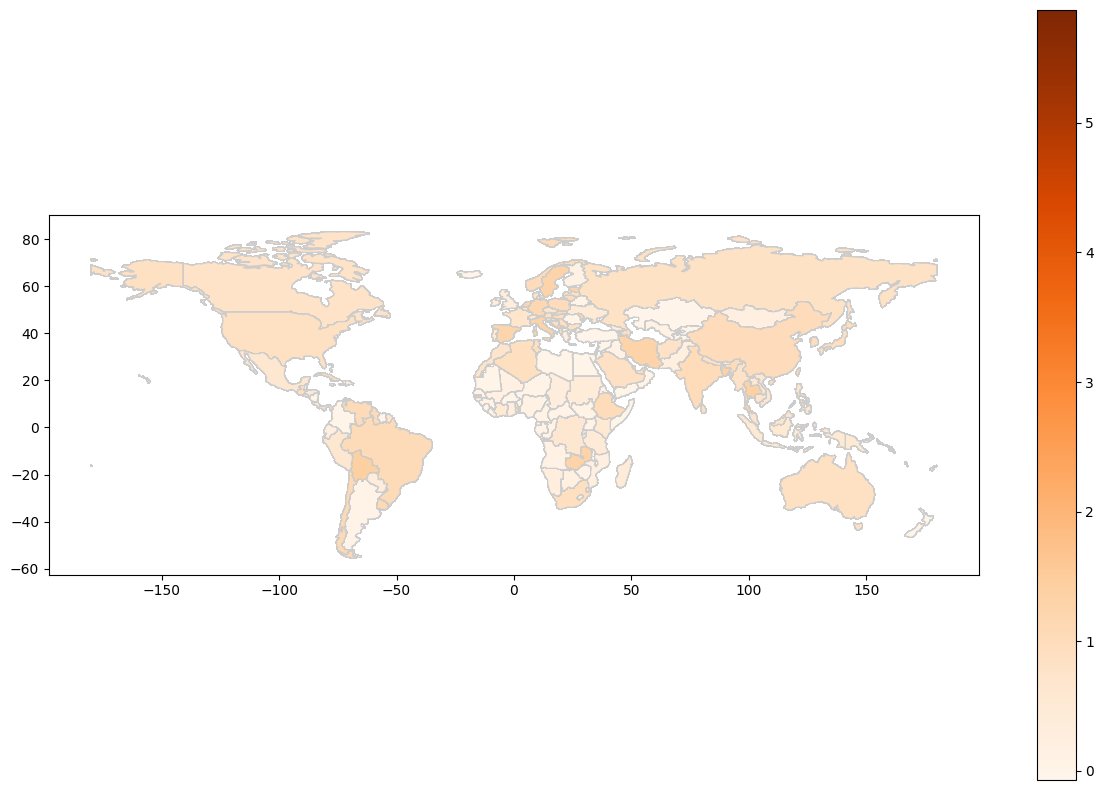

In [99]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()
merged_data = world.merge(data[["iso_code", 'reproduction_rate']], left_on='iso_a3', right_on='iso_code', how='left')
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='reproduction_rate', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

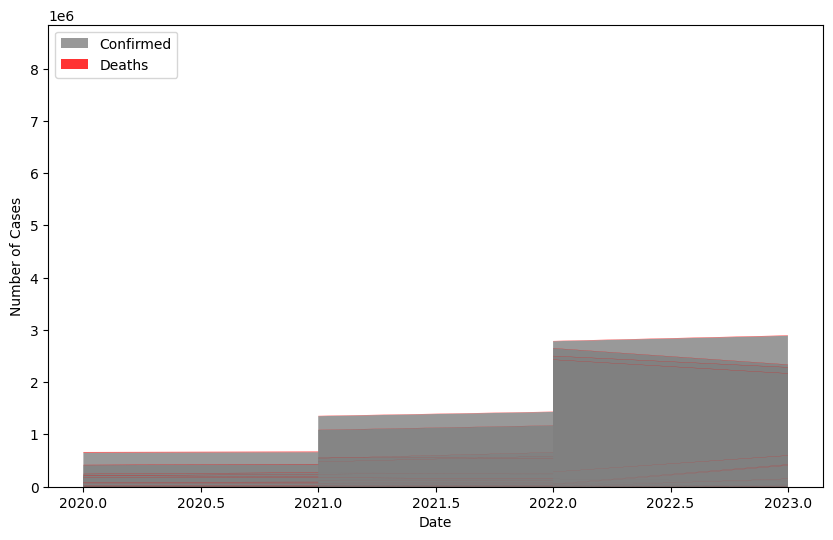

In [29]:
# Plotting stacked area chart
plt.figure(figsize=(10, 6))

plt.stackplot(data['date'].dt.year, data['new_cases'], data['new_deaths'],
              labels=['Confirmed', 'Deaths'], colors = ['gray', 'red'], alpha=0.8)

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left')

plt.show()


# visualising data by `location`

## Separating the country dataset.

In [30]:
country_df = data[(data['location'] == 'United States') | (data['location'] == 'United Kingdom') | (data['location'] == 'Russia') | (data['location'] == 'China')]

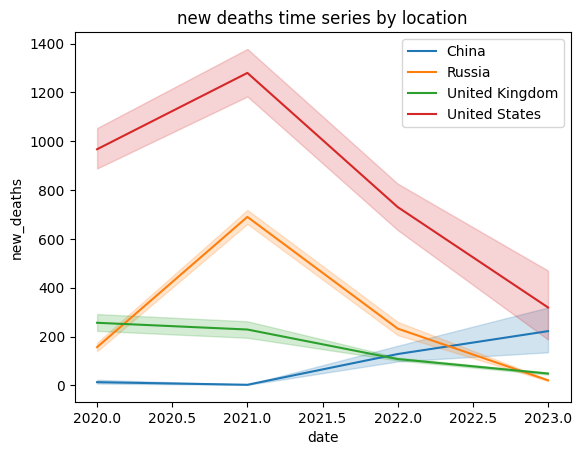

In [31]:
sns.lineplot(data = country_df, x = country_df['date'].dt.year, y = country_df['new_deaths'], hue = 'location')
plt.title('new deaths time series by location')
plt.legend()

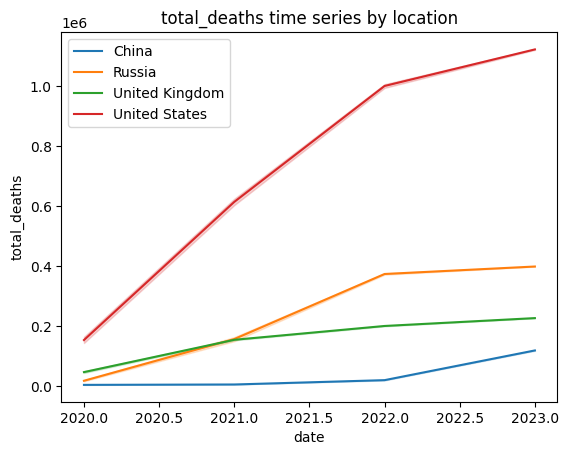

In [32]:
sns.lineplot(data = country_df, x = country_df['date'].dt.year, y = country_df['total_deaths'], hue = 'location')
plt.title('total_deaths time series by location')
plt.legend()

In [33]:
# calculating the total_death percantage of each location
percentages = []
locations = list(set(country_df['location']))
for location in locations:
    percentages.append(((data[data['location'] == location]['total_deaths'].max()) / (data[data['location'] == location]['population'].max())) * 100)   

Text(0.5, 1.0, 'total_death percentage')

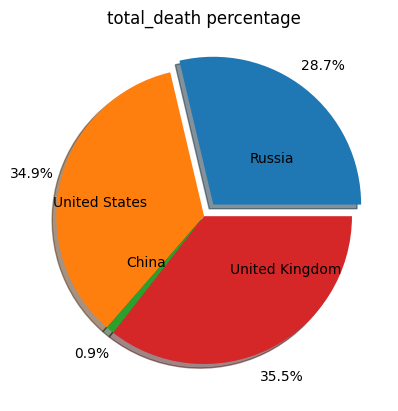

In [35]:
fig, ax = plt.subplots()
ax.pie(percentages, labels=locations, autopct='%1.1f%%',
       pctdistance=1.2, labeldistance=.4, explode = (0.1, 0, 0, 0, ), shadow = True)
plt.title('total_death percentage')

## Also lets check the countries with more number of deaths.

In [36]:
data[data['total_deaths'] >= 100000].sort_values(by = 'total_deaths', ascending=False)['location'].unique()

array(['World', 'High income', 'Upper middle income', 'Europe', 'Asia',
       'North America', 'South America', 'Lower middle income',
       'European Union', 'United States', 'Brazil', 'India', 'Russia',
       'Mexico', 'Africa', 'United Kingdom', 'Peru', 'Italy', 'Germany',
       'France', 'Indonesia', 'Iran', 'Colombia', 'Argentina', 'Spain',
       'China', 'Poland', 'Ukraine', 'South Africa', 'Turkey'],
      dtype=object)

In [39]:
country_df2 = data[(data['location'] == 'Iran') | (data['location'] == 'Brazil') | (data['location'] == 'Russia') | (data['location'] == 'China') | 
                   (data['location'] == 'United States') | (data['location'] == 'Spain') | (data['location'] == 'Italy') | (data['location'] == 'Mexico') |
                   (data['location'] == 'Peru') | (data['location'] == 'Germany')]

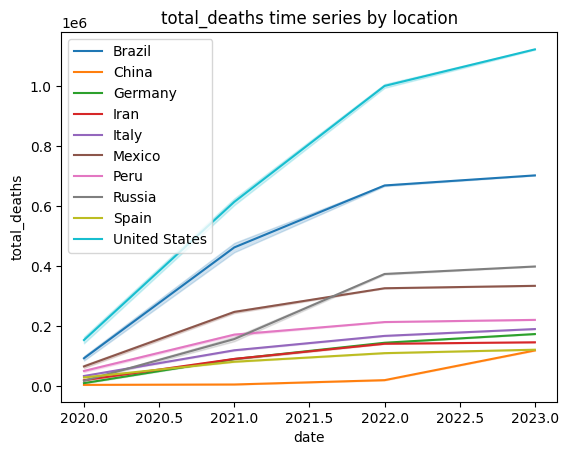

In [40]:
sns.lineplot(data = country_df2, x = country_df2['date'].dt.year, y = country_df2['total_deaths'], hue = 'location')
plt.title('total_deaths time series by location')
plt.legend()

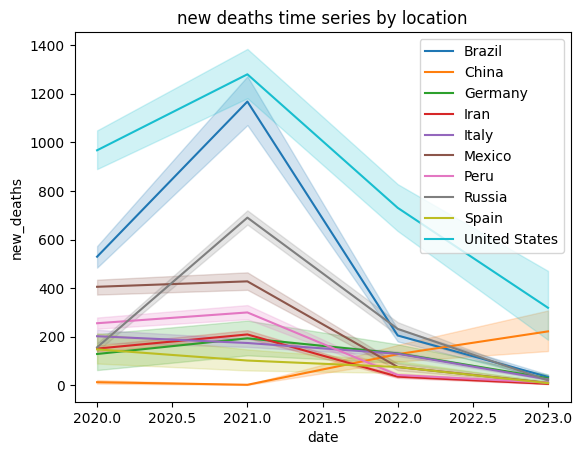

In [41]:
sns.lineplot(data = country_df2, x = country_df2['date'].dt.year, y = country_df2['new_deaths'], hue = 'location')
plt.title('new deaths time series by location')
plt.legend()

In [38]:
percentages = []
locations = list(set(country_df2['location']))
for location in locations:
    percentages.append(((data[data['location'] == location]['total_deaths'].max()) / (data[data['location'] == location]['population'].max())) * 100)   

Text(0.5, 1.0, 'total_death percentage')

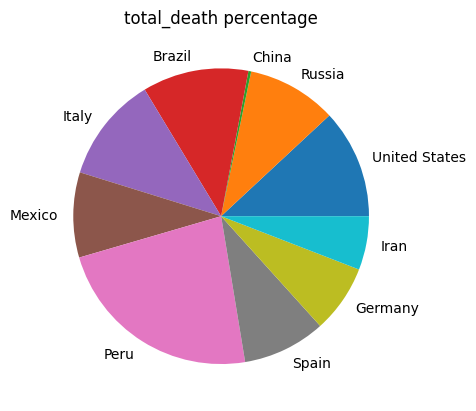

In [53]:
fig, ax = plt.subplots()
ax.pie(percentages, labels=locations)
plt.title('total_death percentage')

In [40]:
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

C:\Users\kara\AppData\Local\Temp\ipykernel_15588\3990411687.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = country_df2, x = 'location', y = 'gdp_per_capita', palette = colors)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Iran'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Russia'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'United States')])

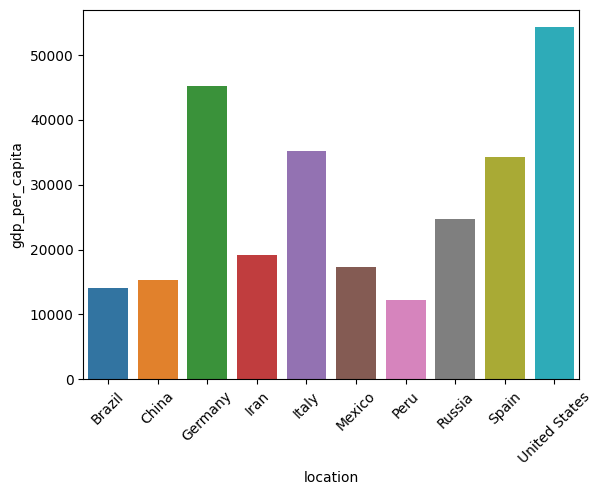

In [41]:
sns.barplot(data = country_df2, x = 'location', y = 'gdp_per_capita', palette = colors)
plt.xticks(rotation = 45)

C:\Users\kara\AppData\Local\Temp\ipykernel_15588\2591562375.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = country_df2, x = 'location', y = 'life_expectancy', palette=colors)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Iran'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Russia'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'United States')])

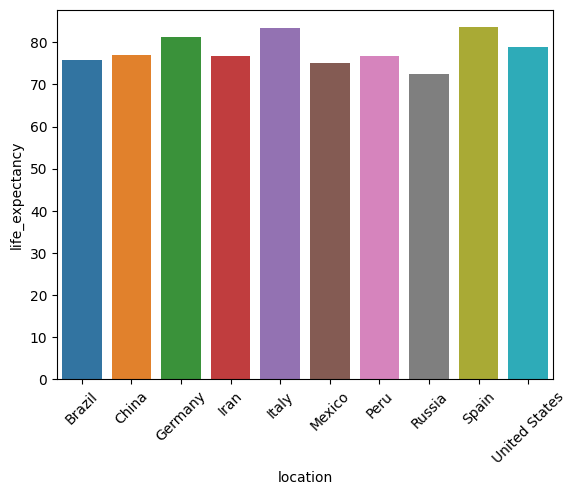

In [42]:
sns.barplot(data = country_df2, x = 'location', y = 'life_expectancy', palette=colors)
plt.xticks(rotation = 45)

C:\Users\kara\AppData\Local\Temp\ipykernel_15588\2778918894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = country_df2, x = 'location', y = country_df2['reproduction_rate'], palette=colors)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Iran'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'Russia'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'United States')])

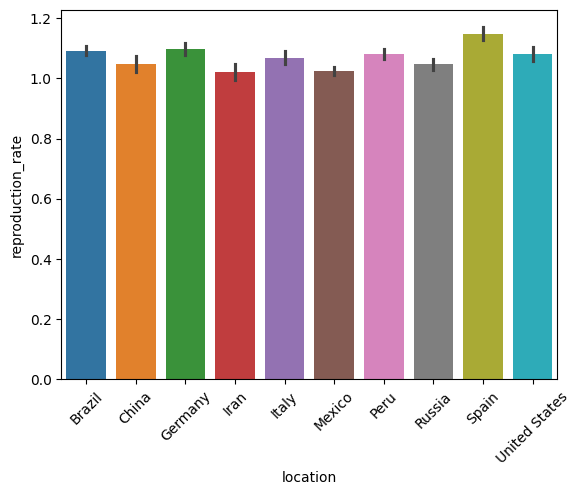

In [43]:
sns.barplot(data = country_df2, x = 'location', y = country_df2['reproduction_rate'], palette=colors)
plt.xticks(rotation = 45)

## Geometric plot of different countries and regions `total_deaths`.

C:\Users\kara\AppData\Local\Temp\ipykernel_15588\1104154754.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


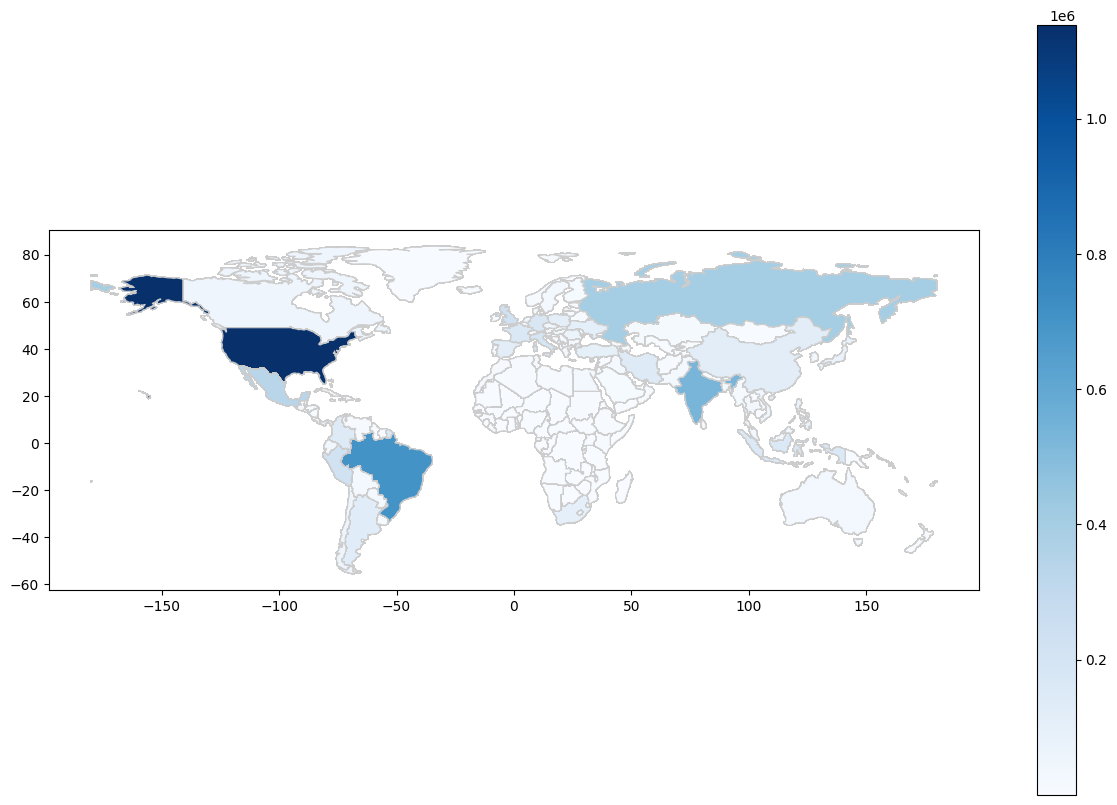

In [44]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()
merged_data = world.merge(data[["iso_code", "total_deaths"]], left_on='iso_a3', right_on='iso_code', how='left')
fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot(column='total_deaths', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

## Visualising new cases.